In [2]:
import os
import json
import logging
from itertools import chain
from math import log
import sys
sys.path.append('/Users/yigong/genie/')
import pandas as pd
import numpy as np
from jinja2 import Template
from sklearn import preprocessing, tree, metrics
from sklearn.linear_model import Lasso, LassoCV
from scipy.stats import stats
from copy import deepcopy
from utils3.data_io_utils import *
from utils3.misc_utils import *
from functools import reduce
from math import log
from utils3.metrics import *
import utils3.feature_selection as fs
import utils3.modeling
import sklearn

In [3]:
#读取数据
df = pd.read_excel('1121data.xlsx')
df = df.sort_index()
X = df.iloc[:,6:]
y = df['label']

In [4]:
#分train test
X_train,X_test, y_train, y_test =sklearn.model_selection.train_test_split(X,y,test_size=0.3, random_state=40)

In [5]:
#创建变量字典
var_dict = pd.DataFrame(columns=['数据源', '指标英文', '指标中文','数据类型'])
var_dict['数据源'] = X.columns
var_dict['指标英文'] = X.columns
var_dict['指标中文'] = X.columns
var_dict['数据类型'] = var_dict['数据源'].map(dict(X.dtypes))
var_dict.数据类型.replace({'int64':'integer','float64':'float','object':'varchar'}, inplace=True)

In [6]:
#train test分别分箱并计算woe
args_dict = {
    'random_forest': {
        'grid_search': False,  # 选择了True则会进行网格筛选速度会比较慢
        'param': None
    },
    'xgboost': {
        'grid_search': False,
        'param': None
    }
}
methods = [
    'random_forest',
    #'lasso',
    'xgboost'
]
woe = fs.FeatureSelection()
X_train_cat, X_train_transformed, woe_iv_df_train, rebin_spec_train, result_train = woe.overall_ranking(X_train,y_train,var_dict, args_dict, methods, n_clusters=5)
X_test_cat, X_test_transformed, woe_iv_df_test, rebin_spec_test, result_test = woe.overall_ranking(X_test,y_test,var_dict, args_dict, methods, n_clusters=5)

Warnings: downflag variable is not in downflagmap provided for idcardgender
Warnings: downflag variable is not in downflagmap provided for id_city_level
Warnings: downflag variable is not in downflagmap provided for age
Warnings: downflag variable is not in downflagmap provided for loans_count
Warnings: downflag variable is not in downflagmap provided for loans_long_time
Warnings: downflag variable is not in downflagmap provided for consfin_org_count
Warnings: downflag variable is not in downflagmap provided for loans_cash_count
Warnings: downflag variable is not in downflagmap provided for latest_six_month
Warnings: downflag variable is not in downflagmap provided for history_fail_fee
Warnings: downflag variable is not in downflagmap provided for latest_three_month
Warnings: downflag variable is not in downflagmap provided for latest_one_month_fail
Warnings: downflag variable is not in downflagmap provided for latest_one_month
Warnings: downflag variable is not in downflagmap provided

/Users/yigong/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/yigong/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[0]	train-auc:0.54543	test-auc:0.506485
[10]	train-auc:0.651101	test-auc:0.503617
[20]	train-auc:0.697404	test-auc:0.504908
[30]	train-auc:0.729508	test-auc:0.501218
Warnings: downflag variable is not in downflagmap provided for idcardgender
Warnings: downflag variable is not in downflagmap provided for id_city_level
Warnings: downflag variable is not in downflagmap provided for age
Warnings: downflag variable is not in downflagmap provided for loans_count
Warnings: downflag variable is not in downflagmap provided for loans_long_time
Warnings: downflag variable is not in downflagmap provided for consfin_org_count
Warnings: downflag variable is not in downflagmap provided for loans_cash_count
Warnings: downflag variable is not in downflagmap provided for latest_six_month
Warnings: downflag variable is not in downflagmap provided for history_fail_fee
Warnings: downflag variable is not in downflagmap provided for latest_three_month
Warnings: downflag variable is not in downflagmap provide

/Users/yigong/anaconda3/lib/python3.6/site-packages/pandas/core/indexing.py:1472: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  return self._getitem_tuple(key)
/Users/yigong/anaconda3/lib/python3.6/site-packages/xgboost/core.py:587: FutureWarning: Series.base is deprecated and will be removed in a future version
  if getattr(data, 'base', None) is not None and \


[10]	train-auc:0.681006	test-auc:0.493109
[20]	train-auc:0.753145	test-auc:0.501686
[30]	train-auc:0.800792	test-auc:0.48971
[40]	train-auc:0.831361	test-auc:0.491133


In [10]:
#训练模型
import utils3.modeling
lrr = utils3.modeling.LogisticModel(var_dict, y_train.sort_index(), y_test.sort_index())
lr_model = lrr.fit_model('', X_train_transformed, X_test_transformed, X_train.columns.tolist())

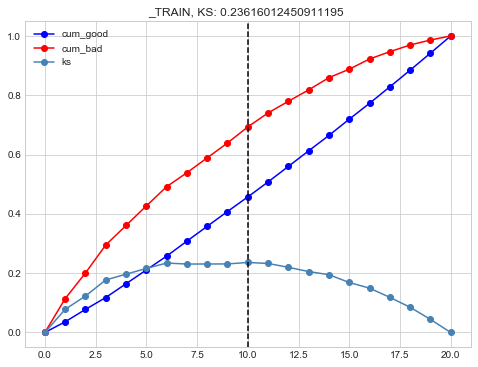

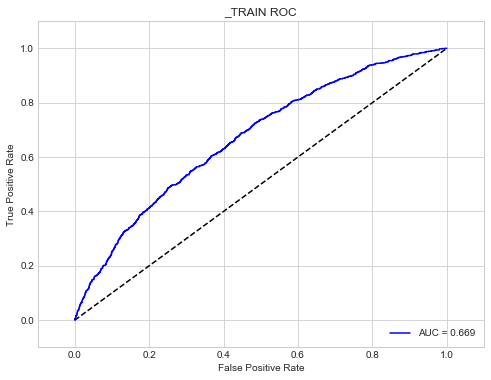

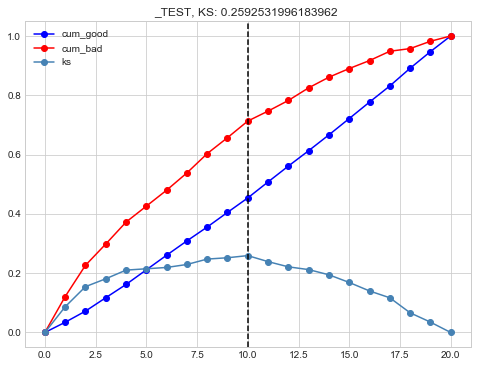

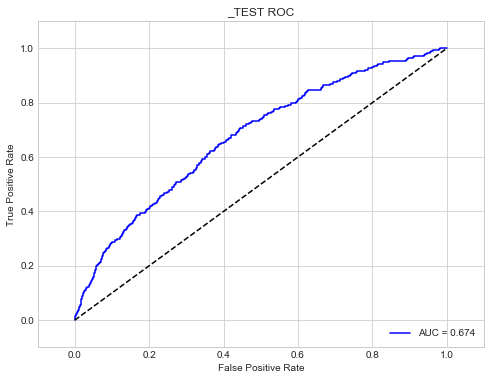

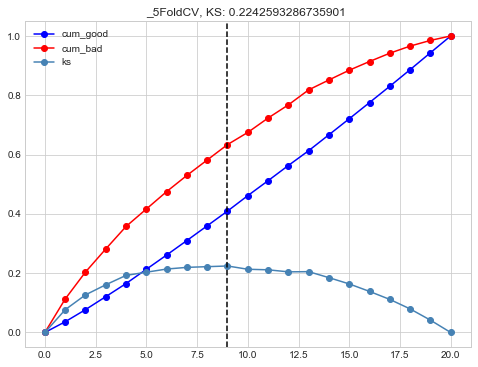

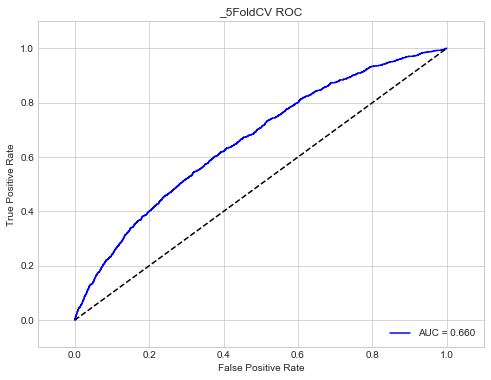

In [12]:
#模型结果可视化
RESULT_PATH = '/Users/yigong/Desktop/mintech/11.21/test/'
lrr.plot_for_the_model(RESULT_PATH, lr_model, with_test=True)